Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

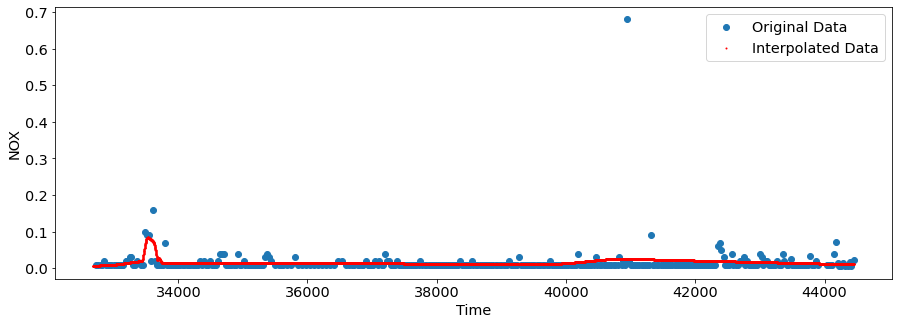

313/313 [==============================] - 0s 356us/step - loss: 4.1291e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//NOX/saved_model/my_modelBB51_NOX')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/NOX_data/BB51.csv")
time = df['time'].values
NOX = df['NOX'].values
df

#Transform the normalized scale to real scale
NOX_min = 0.005
NOX_max = 0.68
time_min = 32723.43                         
time_max = 44454.46                             

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(NOX_max - NOX_min) + NOX_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, NOX*(NOX_max - NOX_min) + NOX_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('NOX')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.234043158
,0.239072557
,0.24947233
,0.254672217
,0.259872104
,0.265157235
,0.270186634
,0.275386521
,0.280586408
,0.285786295
,0.290986182
,0.296271313
,0.301300712
,0.306500599
,0.311700486
,0.316900372
,0.322100259
,0.32738539
,0.332500033
,0.342899807
,0.955207805
,0.957765126
,0.960407691
])
interpolation

array([[0.01417308],
       [0.01414042],
       [0.01407289],
       [0.01403913],
       [0.01400536],
       [0.01397104],
       [0.01392327],
       [0.01386949],
       [0.01381571],
       [0.01376194],
       [0.01370816],
       [0.01365351],
       [0.01360149],
       [0.01354772],
       [0.01354768],
       [0.01358508],
       [0.01362342],
       [0.01366099],
       [0.01356029],
       [0.01335551],
       [0.01184336],
       [0.01165562],
       [0.01146161]], dtype=float32)